<a href="https://colab.research.google.com/github/pks98/Pracfiles/blob/main/ColumnTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('covid_toy.csv')

In [4]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [5]:
df.shape

(100, 6)

In [6]:
df['has_covid'].value_counts()

No     55
Yes    45
Name: has_covid, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


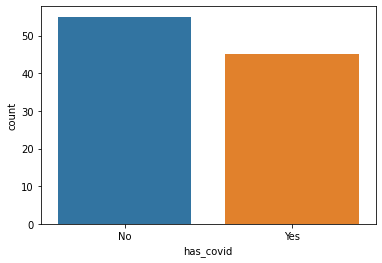

In [7]:
sns.countplot(df['has_covid'])

In [8]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [9]:
df['cough'].value_counts()

Mild      62
Strong    38
Name: cough, dtype: int64

In [10]:
df['gender'].value_counts()

Female    59
Male      41
Name: gender, dtype: int64

In [11]:
df['city'].value_counts()

Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: city, dtype: int64

# **Data processing without column transformer**






1.   **Fever** column has 10 null values,**SimpleImputer** must be used in this case

2.   **OrdinalEncoder** should be applied on **caugh** colunmn

3. **OneHotEncoding** should be applied on **gender** and **city** column
4. **LabelEncoder** should be applied on **has_covid** column

In [18]:
x=df.drop('has_covid',axis=1)
y=df['has_covid']

In [21]:
x.head()

,age,gender,fever,cough,city
0,60,Male,103.0,Mild,Kolkata
1,27,Male,100.0,Mild,Delhi
2,42,Male,101.0,Mild,Delhi
3,31,Female,98.0,Mild,Kolkata
4,65,Female,101.0,Mild,Mumbai


In [17]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_train.shape,x_test.shape

((80, 5), (20, 5))

SimpleImputer

In [28]:
from sklearn.impute import SimpleImputer

si=SimpleImputer()
x_train_fever=si.fit_transform(x_train[['fever']])
x_test_fever=si.transform(x_test[['fever']])

x_train_fever.shape,x_test_fever.shape

((80, 1), (20, 1))

OrdinalEncoder

In [31]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder(categories=[['Mild','Strong']])
x_train_cough=oe.fit_transform(x_train[['cough']])
x_test_cough=oe.transform(x_test[['cough']])

x_train_cough.shape,x_test_cough.shape

((80, 1), (20, 1))

OneHotEncoder

In [32]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(drop='first',sparse=False)
x_train_gender_city=ohe.fit_transform(x_train[['gender','city']])
x_test_gender_city=ohe.transform(x_test[['gender','city']])

x_train_gender_city.shape,x_test_gender_city.shape

((80, 4), (20, 4))

LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

y_train.shape,y_test.shape

((80,), (20,))

In [45]:
x_train_age=x_train.drop(['gender','fever','cough','city'],axis=1).values
x_test_age=x_test.drop(['gender','fever','cough','city'],axis=1).values

x_train_age.shape,x_test_age.shape

((80, 1), (20, 1))

In [51]:
x_train=np.concatenate((x_train_age,x_train_fever,x_train_cough,x_train_gender_city),axis=1)
x_test=np.concatenate((x_test_age,x_test_fever,x_test_cough,x_test_gender_city),axis=1)

x_train.shape,x_test.shape

((80, 7), (20, 7))

In [50]:
x_train[0:6,:]

array([[ 22.,  99.,   0.,   0.,   0.,   0.,   0.],
       [ 56., 104.,   1.,   0.,   0.,   0.,   0.],
       [ 31.,  98.,   0.,   0.,   0.,   1.,   0.],
       [ 75., 104.,   1.,   0.,   1.,   0.,   0.],
       [ 72.,  99.,   0.,   1.,   0.,   0.,   0.],
       [ 66.,  99.,   1.,   1.,   0.,   0.,   0.]])

# **Data processing with column transformer**

In [53]:
df=pd.read_csv('covid_toy.csv')
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
x_train.shape,x_test.shape

((80, 5), (20, 5))

In [56]:
from sklearn.compose import ColumnTransformer


In [57]:
transformer=ColumnTransformer(transformers=[
                                            ('t1',SimpleImputer(),['fever']),
                                            ('t2',OneHotEncoder(drop='first',sparse=False),['gender','city']),
                                            ('t3',OrdinalEncoder(categories=[['Mild','Strong']]),['cough'])
],remainder='passthrough')

In [59]:
x_train=transformer.fit_transform(x_train)
x_test=transformer.transform(x_test)

In [60]:
x_train[0:6,:]

array([[ 99.,   0.,   0.,   0.,   0.,   0.,  22.],
       [104.,   0.,   0.,   0.,   0.,   1.,  56.],
       [ 98.,   0.,   0.,   1.,   0.,   0.,  31.],
       [104.,   0.,   1.,   0.,   0.,   1.,  75.],
       [ 99.,   1.,   0.,   0.,   0.,   0.,  72.],
       [ 99.,   1.,   0.,   0.,   0.,   1.,  66.]])

In [61]:
x_test[0:6,:]

array([[100.,   0.,   0.,   1.,   0.,   0.,  19.],
       [104.,   1.,   0.,   0.,   0.,   0.,  25.],
       [101.,   1.,   1.,   0.,   0.,   0.,  42.],
       [101.,   0.,   0.,   0.,   1.,   0.,  81.],
       [102.,   1.,   0.,   1.,   0.,   0.,   5.],
       [100.,   1.,   0.,   1.,   0.,   0.,  27.]])

In [62]:
x_train.shape,x_test.shape

((80, 7), (20, 7))